# Classification by Support Vector Machines

In [1]:
# Clear data in environment
rm(list = ls()) 
graphics.off()
# Load packages
library(caret)# classification and regression training
library(e1071)# Support vetctor machine
library(dplyr) # data manipulation

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Read dataset directly from UCI repository

In [2]:
url_path <- paste0("https://archive.ics.uci.edu/ml/machine-learning-databases/",
                   "00292/Wholesale%20customers%20data.csv")
wholesale <- read.csv(url_path, sep = ",")
rm(url_path)

## Label categorical variables

In [3]:
wholesale$Region <- factor(wholesale$Region, levels = 1:3,
                           labels = c("Lisbon", "Porto", "Other"))
wholesale$Channel <- factor(wholesale$Channel, levels = 1:2,
                            labels = c("Horeca", "Retail"))

## Dataset details

In [4]:
head(wholesale) # First rows of the dataset
str(wholesale) # object structure
dim(wholesale) # object dimension 
summary(wholesale) # summaries of the variables
any(is.na(wholesale)) # check for nulls

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Horeca,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185
6,Retail,Other,9413,8259,5126,666,1795,1451


'data.frame':	440 obs. of  8 variables:
 $ Channel         : Factor w/ 2 levels "Horeca","Retail": 2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : Factor w/ 3 levels "Lisbon","Porto",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


[1] 440   8

   Channel       Region        Fresh             Milk          Grocery     
 Horeca:298   Lisbon: 77   Min.   :     3   Min.   :   55   Min.   :    3  
 Retail:142   Porto : 47   1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153  
              Other :316   Median :  8504   Median : 3627   Median : 4756  
                           Mean   : 12000   Mean   : 5796   Mean   : 7951  
                           3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656  
                           Max.   :112151   Max.   :73498   Max.   :92780  
     Frozen        Detergents_Paper    Delicassen     
 Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

[1] FALSE

## Prepare data for analysis

In [5]:
# Exclueded Region column
wholesale<- select(wholesale, -Region)
head(wholesale)

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>
1,Retail,12669,9656,7561,214,2674,1338
2,Retail,7057,9810,9568,1762,3293,1776
3,Retail,6353,8808,7684,2405,3516,7844
4,Horeca,13265,1196,4221,6404,507,1788
5,Retail,22615,5410,7198,3915,1777,5185
6,Retail,9413,8259,5126,666,1795,1451


## Define train and test sets

In [6]:
seed <- 288
set.seed(seed)
train_index <- createDataPartition(wholesale$Channel, p= 0.8,list = FALSE)
train_set <- wholesale[train_index,]
test_set <- wholesale[-train_index,]

## Model SVM: model : linear, 3 features

In [7]:
set.seed(seed)
svm.linear3 <- svm(Channel ~ Fresh + Milk + Grocery,
                   data = train_set,
                   kernel = "linear")
summary(svm.linear3)


Call:
svm(formula = Channel ~ Fresh + Milk + Grocery, data = train_set, 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  126

 ( 63 63 )


Number of Classes:  2 

Levels: 
 Horeca Retail




With SVM- Classification (Kernel-linear), the total number of support vectors to do the division was 126. The model used 63 for the Horeca class and 63 for Retail.

## Predictions | Confusion Matrix

In [8]:
pred.linear3 <- predict(svm.linear3, test_set)
confusionMatrix(data = pred.linear3,
                reference = test_set$Channel,mode = 'everything' )

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     58      5
    Retail      1     23
                                          
               Accuracy : 0.931           
                 95% CI : (0.8559, 0.9743)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 1.437e-08       
                                          
                  Kappa : 0.8358          
                                          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.9831          
            Specificity : 0.8214          
         Pos Pred Value : 0.9206          
         Neg Pred Value : 0.9583          
              Precision : 0.9206          
                 Recall : 0.9831          
                     F1 : 0.9508          
             Prevalence : 0.6782          
         Detection Rate : 0.6667          
   Detection Prevalence : 0.7241          
      Balanc

With Specificity of (0.821), it shows some difficulty in identifying Retail examples.

## Train SVM model : linear, 6 features

In [9]:
set.seed(seed)
svm.linear6 <- svm(Channel ~.,
                   data = train_set,
                   kernel= 'linear')
summary(svm.linear6)


Call:
svm(formula = Channel ~ ., data = train_set, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  93

 ( 47 46 )


Number of Classes:  2 

Levels: 
 Horeca Retail




With SVM- Classification (Kernel-linear), the total number of support vectors to do the division was 93. The model used 47 for the Horeca class and 46 for Retail.

## Predictions | Confusion Matrix

In [10]:
pred.linear6 <- predict(svm.linear6, test_set)
confusionMatrix(data = pred.linear6,
                reference = test_set$Channel,
                mode = 'everything')

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     57      2
    Retail      2     26
                                          
               Accuracy : 0.954           
                 95% CI : (0.8864, 0.9873)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 2.65e-10        
                                          
                  Kappa : 0.8947          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9661          
            Specificity : 0.9286          
         Pos Pred Value : 0.9661          
         Neg Pred Value : 0.9286          
              Precision : 0.9661          
                 Recall : 0.9661          
                     F1 : 0.9661          
             Prevalence : 0.6782          
         Detection Rate : 0.6552          
   Detection Prevalence : 0.6782          
      Balanc

The model trained with the 6 variables, shows a balanced ability to identify both classes. With high specificity and sensitivity values.

## Train SVM model : Radial, 3 features

In [11]:
set.seed(seed)
svm.radial3 <- svm(Channel ~ Fresh + Milk + Grocery,
                   data = train_set,
                   kernel = "radial")
summary(svm.radial3)


Call:
svm(formula = Channel ~ Fresh + Milk + Grocery, data = train_set, 
    kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  128

 ( 64 64 )


Number of Classes:  2 

Levels: 
 Horeca Retail




With SVM-Classification (Kernel-radial), the total number of support vectors to do the division was 128. The model used 64 for the Horeca class and 64 for Retail.

## Predictions | Confusion Matrix

In [12]:
pred.radial3 <- predict(svm.radial3, test_set)
confusionMatrix(data = pred.radial3,
                reference = test_set$Channel)

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     57      6
    Retail      2     22
                                          
               Accuracy : 0.908           
                 95% CI : (0.8268, 0.9595)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 3.999e-07       
                                          
                  Kappa : 0.7811          
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9661          
            Specificity : 0.7857          
         Pos Pred Value : 0.9048          
         Neg Pred Value : 0.9167          
             Prevalence : 0.6782          
         Detection Rate : 0.6552          
   Detection Prevalence : 0.7241          
      Balanced Accuracy : 0.8759          
                                          
       'Positive' Class : Horeca          
            

The model trained with the 3 features and radial kernel shows fair performance. With a low specificity of 0.7857, it shows some difficulty in correctly classifying the retail class.

## Train SVM model : Radial, 6 features

In [13]:
set.seed(seed)
svm.radial6 <- svm(Channel ~ .,
                   data = train_set,
                   kernel = "radial")
summary(svm.radial6)


Call:
svm(formula = Channel ~ ., data = train_set, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  120

 ( 58 62 )


Number of Classes:  2 

Levels: 
 Horeca Retail




With SVM-Classification (Kernel-radial), the total number of support vectors to do the division was 120. The model used 58 for the Horeca class and 62 for Retail.

## Predictions | Confusion Matrix

In [14]:
pred.radial6 <- predict(svm.radial6, test_set)
confusionMatrix(data = pred.radial6,
                reference = test_set$Channel)

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     57      4
    Retail      2     24
                                          
               Accuracy : 0.931           
                 95% CI : (0.8559, 0.9743)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 1.437e-08       
                                          
                  Kappa : 0.839           
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.9661          
            Specificity : 0.8571          
         Pos Pred Value : 0.9344          
         Neg Pred Value : 0.9231          
             Prevalence : 0.6782          
         Detection Rate : 0.6552          
   Detection Prevalence : 0.7011          
      Balanced Accuracy : 0.9116          
                                          
       'Positive' Class : Horeca          
            

The model trained with the 6 features and radial kernel improved performance compared to the 3 feature model.

## Tuning

In [15]:
print(paste("Cost:" , svm.radial6$cost))
print(paste("Gamma:", svm.radial6$gamma))

[1] "Cost: 1"
[1] "Gamma: 0.166666666666667"


In [16]:
# Set parameters grid
cost <- 10^(3:4) # cost of constraints violation
gamma <- seq(0.0, 0.3, by = 0.05) # 1/ (nº features)=1/6
# Set tuning control
control <- e1071::tune.control(nrepeat = 5,
                               sampling = "cross",
                               cross = 10)
# Search best performance on parameters grid
set.seed(seed)
svm.tune <- e1071::tune(svm,
                        train.x = train_set[, 2:7],
                        train.y = train_set$Channel,
                        kernel = "radial",
                        tunecontrol = control,
                        ranges = list(cost = cost,
                                      gamma = gamma))
print(svm.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
 1000  0.05

- best performance: 0.1018254 



## Check which hyperparameters were found by grid search

In [17]:
svm.tune$best.parameters$cost
svm.tune$best.parameters$gamma

[1] 1000

[1] 0.05

## Train a new model using those hyperparameters

In [18]:
set.seed(seed)
svm.tuned <- svm(Channel ~ .,
                 data = train_set,
                 kernel = "radial",
                 cost = svm.tune$best.parameters$cost,
                 gamma = svm.tune$best.parameters$gamma)
summary(svm.tuned)


Call:
svm(formula = Channel ~ ., data = train_set, kernel = "radial", cost = svm.tune$best.parameters$cost, 
    gamma = svm.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  87

 ( 45 42 )


Number of Classes:  2 

Levels: 
 Horeca Retail




With SVM-Classification (Kernel-radial), the total number of support vectors to do the division was 87. The model used 45 for the Horeca class and 42 for Retail.

## Predictions | Confusion Matrix

In [19]:
pred.tuned <- predict(svm.tuned, test_set)
confusionMatrix(pred.tuned, test_set$Channel)

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     56      3
    Retail      3     25
                                          
               Accuracy : 0.931           
                 95% CI : (0.8559, 0.9743)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 1.437e-08       
                                          
                  Kappa : 0.842           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9492          
            Specificity : 0.8929          
         Pos Pred Value : 0.9492          
         Neg Pred Value : 0.8929          
             Prevalence : 0.6782          
         Detection Rate : 0.6437          
   Detection Prevalence : 0.6782          
      Balanced Accuracy : 0.9210          
                                          
       'Positive' Class : Horeca          
            

After experimenting with various hyperparameters ranges: “gamma” and “cost”, we got the best model result with an accuracy of 93.10%

## See relationship between variables

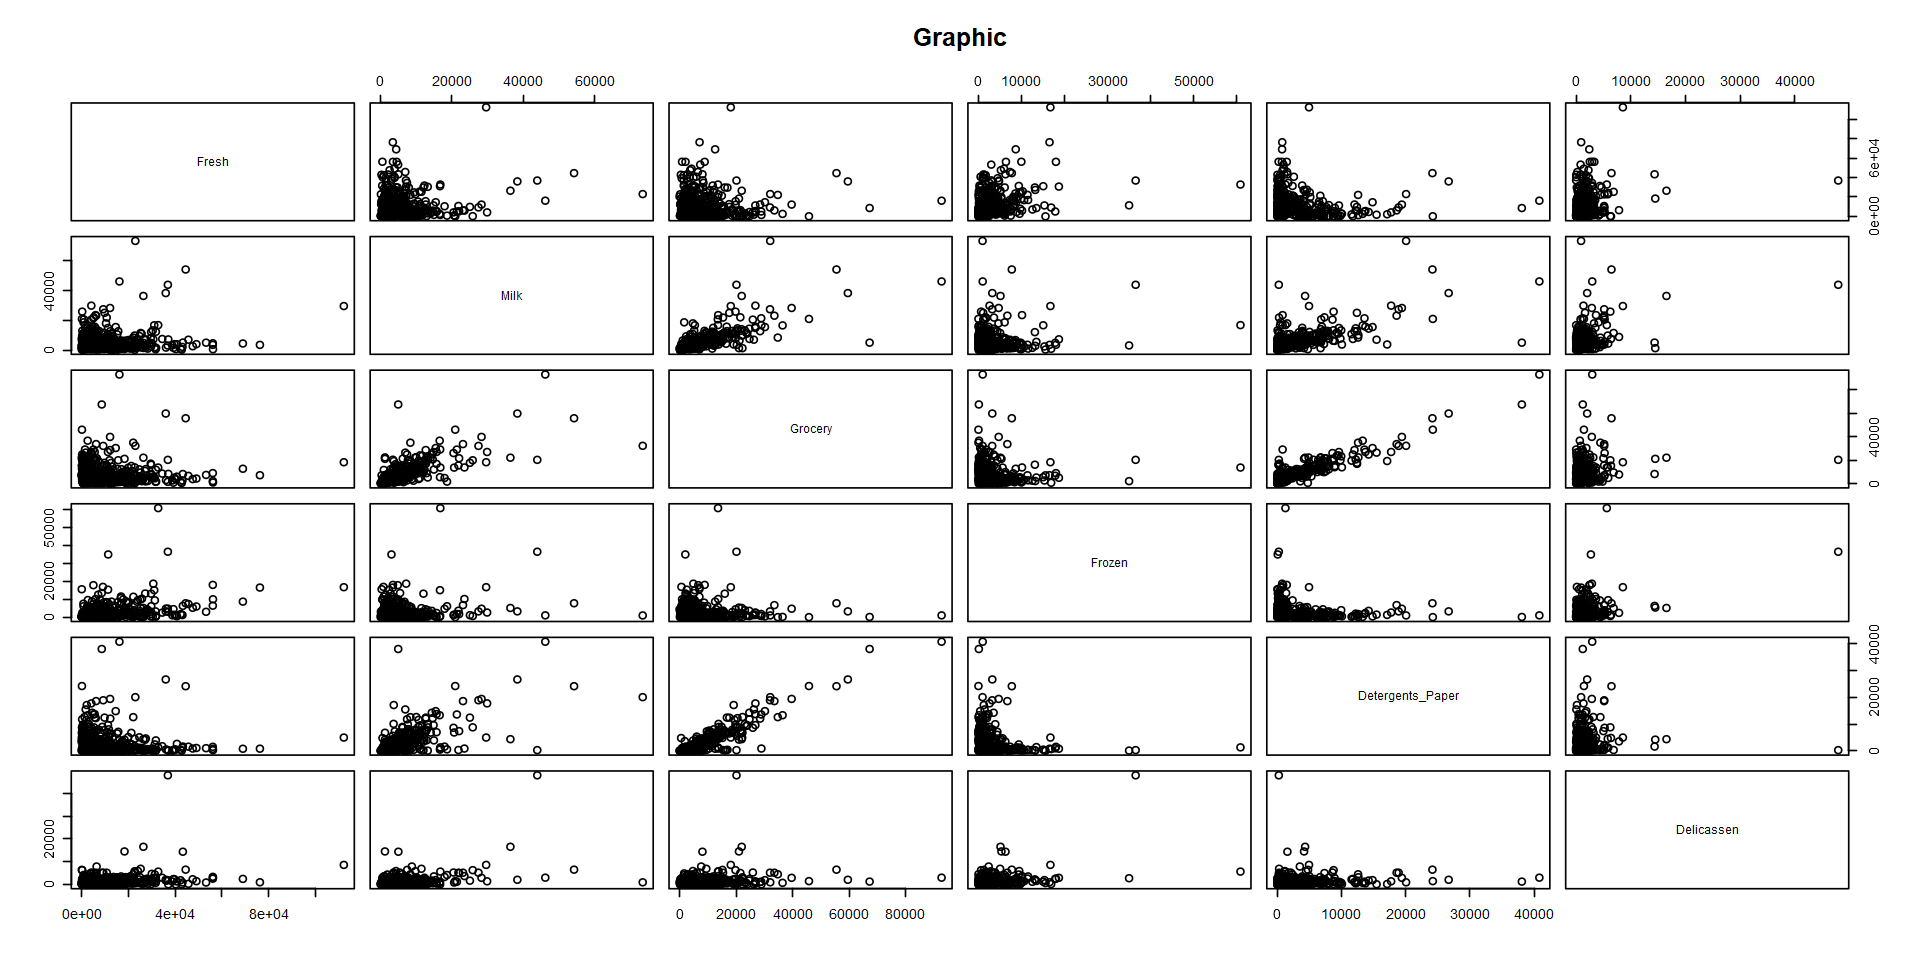

In [20]:
options(repr.plot.width=16, repr.plot.height=8)
pairs(wholesale[, 2:7], main = "Graphic")

## Train the model with other Karnel parameters
### Train SVM model : Kernel = sigmoid, 6 features

In [21]:
set.seed(seed)
svm.sigmoid <- svm(Channel ~ .,
                   data = train_set,
                   kernel = "sigmoid")
summary(svm.sigmoid)


Call:
svm(formula = Channel ~ ., data = train_set, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
     coef.0:  0 

Number of Support Vectors:  70

 ( 36 34 )


Number of Classes:  2 

Levels: 
 Horeca Retail




## Predictions | Confusion Matrix

In [22]:
svm.sigmoid <- predict(svm.sigmoid, test_set)
confusionMatrix(data = svm.sigmoid,
                reference = test_set$Channel)

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     56      6
    Retail      3     22
                                          
               Accuracy : 0.8966          
                 95% CI : (0.8127, 0.9516)
    No Information Rate : 0.6782          
    P-Value [Acc > NIR] : 1.727e-06       
                                          
                  Kappa : 0.7562          
                                          
 Mcnemar's Test P-Value : 0.505           
                                          
            Sensitivity : 0.9492          
            Specificity : 0.7857          
         Pos Pred Value : 0.9032          
         Neg Pred Value : 0.8800          
             Prevalence : 0.6782          
         Detection Rate : 0.6437          
   Detection Prevalence : 0.7126          
      Balanced Accuracy : 0.8674          
                                          
       'Positive' Class : Horeca          
            

## Train SVM model : Kernel =polynomial, 6 features

In [23]:
set.seed(seed)
svm.polynomial <- svm(Channel ~ .,
                   data = train_set,
                   kernel = "polynomial")
summary(svm.polynomial)


Call:
svm(formula = Channel ~ ., data = train_set, kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  161

 ( 78 83 )


Number of Classes:  2 

Levels: 
 Horeca Retail




## Predictions | Confusion Matrix

In [24]:
svm.polynomial <- predict(svm.polynomial, test_set)
confusionMatrix(data = svm.polynomial,
                reference = test_set$Channel)

Confusion Matrix and Statistics

          Reference
Prediction Horeca Retail
    Horeca     59     13
    Retail      0     15
                                        
               Accuracy : 0.8506        
                 95% CI : (0.758, 0.918)
    No Information Rate : 0.6782        
    P-Value [Acc > NIR] : 0.0002062     
                                        
                  Kappa : 0.6101        
                                        
 Mcnemar's Test P-Value : 0.0008741     
                                        
            Sensitivity : 1.0000        
            Specificity : 0.5357        
         Pos Pred Value : 0.8194        
         Neg Pred Value : 1.0000        
             Prevalence : 0.6782        
         Detection Rate : 0.6782        
   Detection Prevalence : 0.8276        
      Balanced Accuracy : 0.7679        
                                        
       'Positive' Class : Horeca        
                                        

***Conclusion***

After testing the performance of the various models, with different Kernel and adjusted parameters, we can conclude that the model with the best results is smv.linear6, with an accuracy of 0.954. 

It was not possible to improve the “Radial Kernal” model by adjusting the “cost” and “gamma” parameters.